In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

from keras.optimizers import Adam

In [5]:
X, y = make_moons(100, noise=0.25, random_state=2)

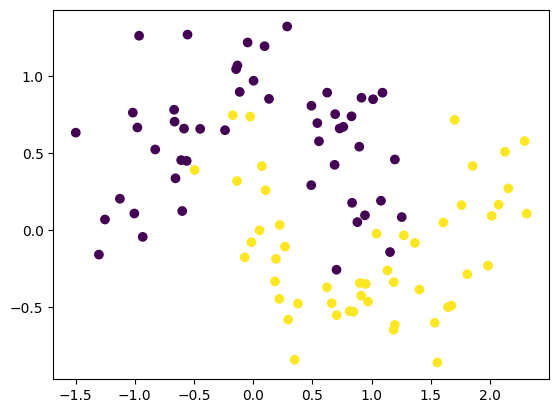

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#### Vanilla Model

In [7]:
model1 = Sequential()

model1.add(Dense(128, input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [8]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',
               optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 9s 913us/step


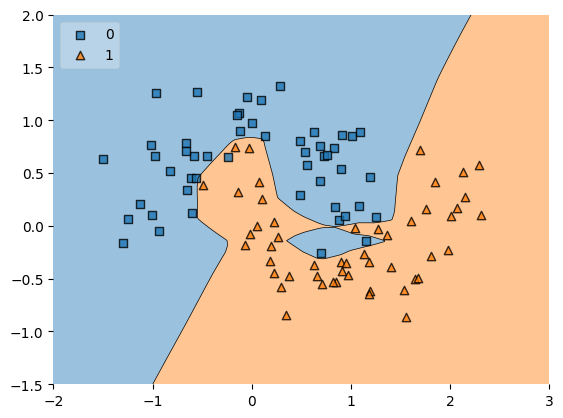

In [ ]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.title('Overfitting can be observed') 
plt.show()

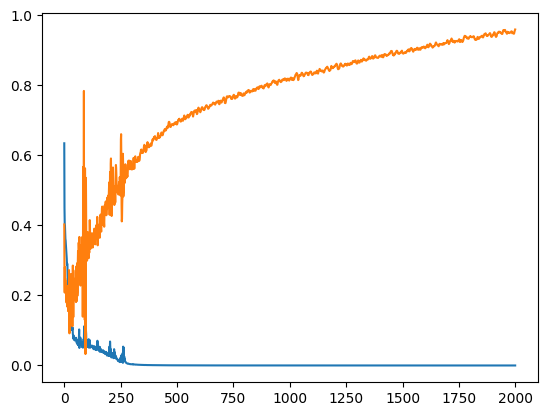

In [10]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

#### Model with L2 Regularized weights

In [ ]:
model2 = Sequential()

model2.add(Dense(128, input_dim=2, activation="relu",
           kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation="relu",
           kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [14]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',
               optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 8s 804us/step


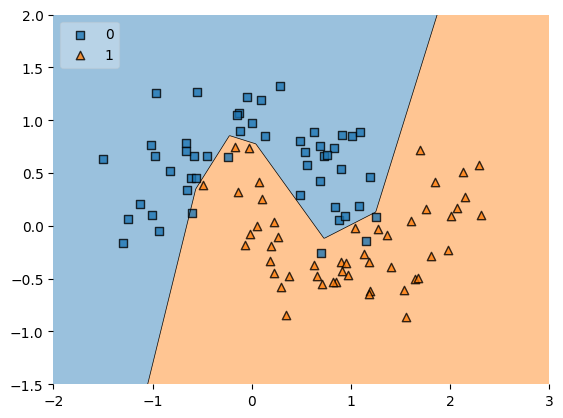

In [15]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

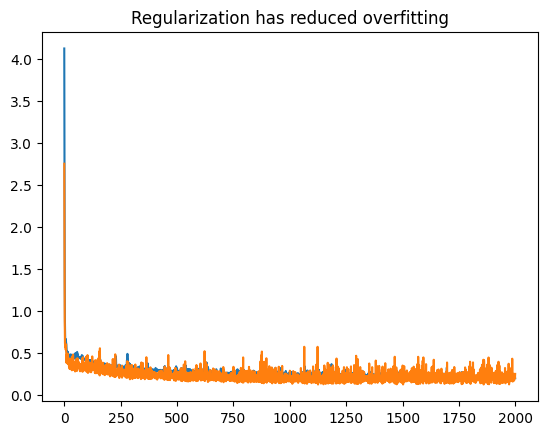

In [16]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Regularization has reduced overfitting')
plt.show()

#### Plotting the weights for both models
 - We can clearly see the difference in range of weights for  both the models

In [17]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

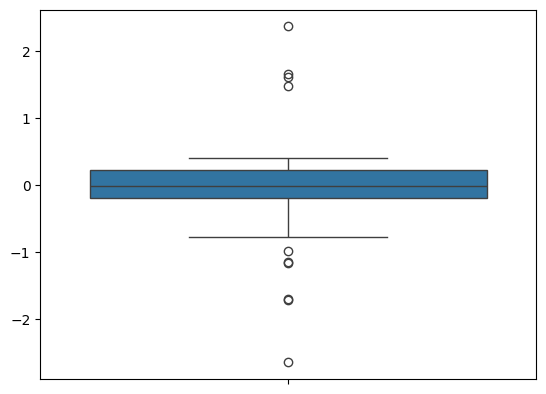

In [18]:
sns.boxplot(model1_weight_layer1)

<Axes: >

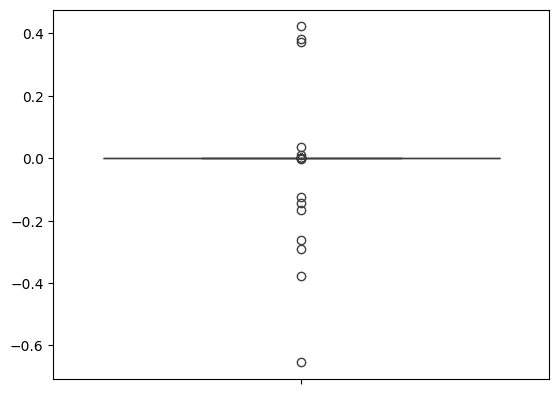

In [19]:
sns.boxplot(model2_weight_layer1)

In [20]:
model1_weight_layer1.min()

-2.648425

In [21]:
model2_weight_layer1.min()

-0.65421957

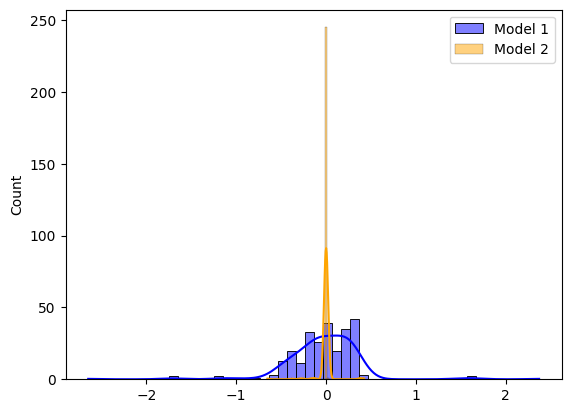

In [ ]:
sns.histplot(model1_weight_layer1, kde=True, color="blue", label="Model 1", bins=50,)
sns.histplot(model2_weight_layer1, kde=True, color="orange", label="Model 2", bins=50,)
plt.legend()
plt.show()

In [23]:
model1.get_weights()[0].reshape(256)

array([-3.35059762e-01,  2.43429199e-01,  2.42122620e-01,  2.88242847e-01,
       -3.94972116e-01, -2.57215917e-01,  1.18084215e-01,  3.07303786e-01,
       -2.27279767e-01, -1.95335343e-01,  1.27223774e-03, -3.01155001e-01,
       -2.06926391e-01,  2.17464954e-01, -4.02568251e-01, -3.64086002e-01,
       -1.68446139e-01,  1.54745638e-01, -3.41782123e-01,  2.93560892e-01,
       -9.94866043e-02,  2.69894242e-01,  2.68460572e-01,  3.86190027e-01,
        6.68394417e-02,  2.79443741e-01,  3.06096196e-01,  2.88846612e-01,
       -2.87939817e-01, -2.17757285e-01,  2.67421752e-01, -3.38720590e-01,
       -8.73941854e-02,  1.02111153e-01, -2.59070188e-01, -3.15711290e-01,
        3.24921578e-01,  2.15482563e-01, -6.01178944e-01, -2.00175866e-01,
       -4.43997860e-01,  2.64431506e-01, -9.85151231e-02, -1.51617795e-01,
       -1.78817436e-01, -4.96680856e-01,  2.16505408e-01,  2.69650072e-01,
       -4.34160292e-01,  1.17502257e-01, -4.89677250e-01,  2.66970068e-01,
       -8.17607939e-02,  